In [ ]:
!pip install -r requirements.txt

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
test_data = pd.read_csv('./test.csv')
train_data = pd.read_csv('./train.csv')
pokemon = pd.read_csv('./pokemon.csv')

In [237]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [238]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [239]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [240]:
pokemon[pokemon.Name.isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [241]:
pokemon.Name.describe()

count         799
unique        799
top       Bayleef
freq            1
Name: Name, dtype: object

#### Nel dataset ci sono 800 Pokemon diversi, guardando le prime 5 righe del dataset è possibile osservare che la prima riga contiene Bulbasaur (Pokemon base) e le successive 3 righe contengono le evoluzioni. Questa cosa si ripete per tutti i Pokemon, Pokemon base, seguito dalle evoluzioni. Con questo per poter trovare il nome del Pokemon mancante è possibile vedere quali Pokemon ci sono prima e dopo e vedere se si tratta di un Pokemon base o di una evoluzione.

In [242]:
pokemon.iloc[[59, 60, 61, 62, 63, 64],:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,1,False
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


#### Il nome nullo è compreso tra Mankey e Growlithe, entrambi Pokemon base. Quindi il nome nullo è Primeape evoluzione di Mankey

In [243]:
pokemon.Name[62] = 'Primeape'

<ipython-input-243-72ed336ab30b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon.Name[62] = 'Primeape'


In [244]:
pokemon.iloc[[61, 62, 63],:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False


#### Ci sono pochissimi Pokemon di Tipo 1 Flying e molti di Tipo 1 Water 

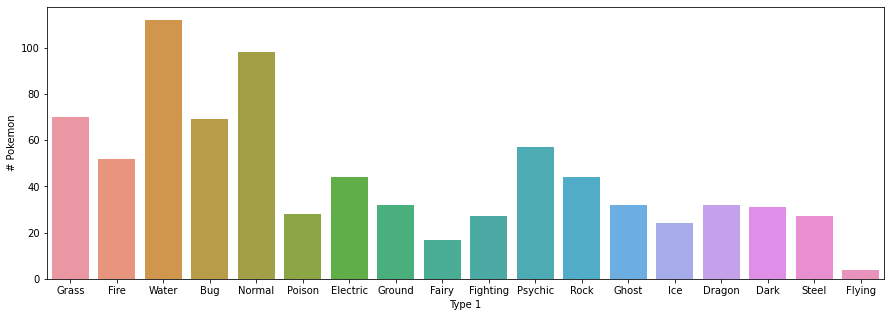

In [246]:
plt.figure(figsize=(15,5))
sns.countplot(x = pokemon['Type 1'])
plt.ylabel('# Pokemon')
plt.show()

#### Quasi la metà dei Pokemon non ha Tipo 2 e nell'insime dei Pokemon che hanno Tipo 2 la maggior parte è Flying

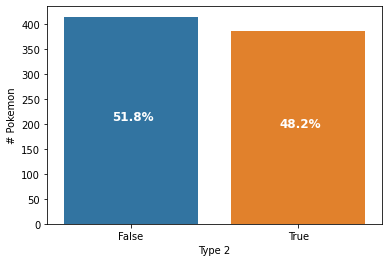

In [247]:
ax = sns.countplot(x = pokemon['Type 2'].isnull())
plt.ylabel('# Pokemon')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(pokemon))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

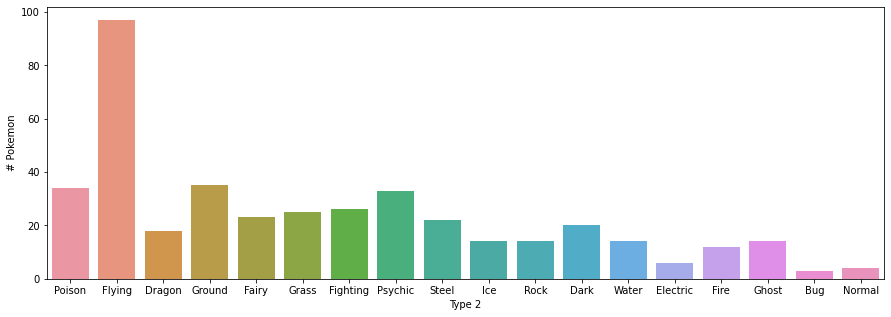

In [248]:
plt.figure(figsize=(15,5))
sns.countplot(x = pokemon['Type 2'])
plt.ylabel('# Pokemon')
plt.show()

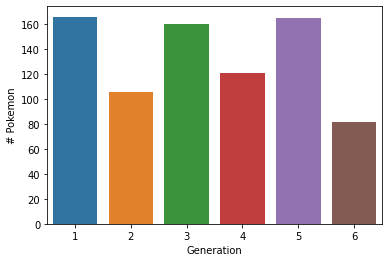

In [249]:
sns.countplot(x = pokemon.Generation)
plt.ylabel('# Pokemon')
plt.show()

#### I Pokemon leggendari sono una piccola parte

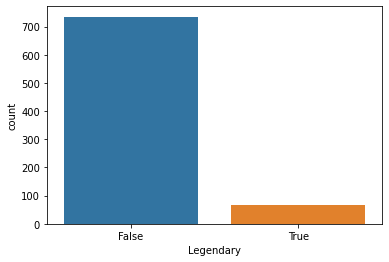

In [250]:
sns.countplot(x = pokemon.Legendary)
plt.show()

In [251]:
pokemon.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

##### La colonna Legenday contiene valori di tipo booleano, i quali possono essere convertiti in 0 (Pokemon non Leggendario) o 1 (Pokemon Leggendario)

In [252]:
pokemon['Legendary'].replace(to_replace = True, value = 1, inplace = True)
pokemon['Legendary'].replace(to_replace = False, value = 0, inplace = True)

In [253]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1


In [254]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [255]:
pokemon['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Ghost       14
Water       14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

##### LabelEncoder per le colonne Type 1 e Type 2

In [256]:
from sklearn.preprocessing import LabelEncoder

label_pokemon_train = pokemon.copy()

label_encoder = LabelEncoder()
label_pokemon_train['Type 1'] = label_encoder.fit_transform(pokemon['Type 1'])
label_pokemon_train['Type 2'] = label_encoder.fit_transform(pokemon['Type 2'])

In [257]:
label_pokemon_train['Type 1'].value_counts()

17    112
12     98
9      70
0      69
14     57
6      52
3      44
15     44
8      32
10     32
2      32
1      31
13     28
5      27
16     27
11     24
4      17
7       4
Name: Type 1, dtype: int64

In [258]:
label_pokemon_train['Type 2'].value_counts()

18    386
7      97
10     35
13     34
14     33
5      26
9      25
4      23
16     22
1      20
2      18
8      14
11     14
15     14
17     14
6      12
3       6
12      4
0       3
Name: Type 2, dtype: int64

In [259]:
label_pokemon_train.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,13,45,49,49,65,65,45,1,0
1,2,Ivysaur,9,13,60,62,63,80,80,60,1,0
2,3,Venusaur,9,13,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0
4,5,Charmander,6,18,39,52,43,60,50,65,1,0


#### Contorllo valori nulli nell'insieme di dati di train e di test

In [263]:
train_data.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [264]:
test_data.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [265]:
train_data.Winner.value_counts()

163    99
154    93
438    90
700    88
432    88
       ..
678     3
734     3
639     2
290     1
237     1
Name: Winner, Length: 783, dtype: int64

In [266]:
pokemon[pokemon['#'] == 163]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,1


#####  Mewtwo è il Pokemon che ha vinto di più scontri nel set di dati di train e Slugma e Silcoon sono quelli che hanno vinto un solo scontro

In [267]:
pokemon.iloc[[162, 236, 289],:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,1
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,0
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,0


In [268]:
numberOfWins = train_data.groupby('Winner').count()

In [269]:
numberOfWins.shape

(783, 2)

In [270]:
countByFirst = train_data.groupby('Second_pokemon').count()
countBySecond = train_data.groupby('First_pokemon').count()

In [271]:
countByFirst.shape

(784, 2)

In [272]:
countBySecond.shape

(784, 2)

#### Nel set di dati c'è un Pokemon che non ha vinto nemmeno uno scontro ed è Shuckle

In [273]:
losing = np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1

In [274]:
pokemon.iloc[losing[0]]

#                 231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary           0
Name: 230, dtype: object

In [275]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

In [276]:
numberOfWins.sort_values(by='Win Percentage', ascending = False)

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
513,72,72,73,0.986301
477,86,86,88,0.977273
155,86,86,88,0.977273
20,74,74,77,0.961039
165,70,70,73,0.958904
...,...,...,...,...
395,3,3,86,0.034884
577,3,3,88,0.034091
639,2,2,82,0.024390


#### Pokemon con % di vincita più alta 

In [277]:
pokemon.iloc[[512, 476, 154, 19, 164],:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,0
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,0
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,0
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,0
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,1


#### Pokemon con % di vincita più bassa

In [278]:
pokemon.iloc[[236, 289, 638, 576, 394],:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,0
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,0
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,0
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,0
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,0


#### Costruisco un array per ogni riga di scontro. Ogni riga dell'array contiene le caratteristiche del Pokemon che attacca per primo seguito dalle caratterische dell'altro Pokemon. L'ultimo elemento dell'array rappresenta la vittoria, 0 se è il Pokemon che attacca per primo a vincere, 1 altrimenti.

In [279]:
train_data.loc[1]

Winner            552
First_pokemon     552
Second_pokemon    542
Name: 1, dtype: int64

In [280]:
train_data.loc[0]

Winner            518
First_pokemon     412
Second_pokemon    518
Name: 0, dtype: int64

In [281]:
p1 = label_pokemon_train[label_pokemon_train['#'] == train_data.loc[0][1]]
p1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
411,412,Metang,16,14,60,75,100,55,80,50,3,0


In [282]:
x = p1.values[:, 2:][0]
x

array([16, 14, 60, 75, 100, 55, 80, 50, 3, 0], dtype=object)

In [283]:
p2 = label_pokemon_train[label_pokemon_train['#'] == train_data.loc[0][2]]
p2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
517,518,Electivire,3,18,75,123,67,95,85,95,4,0


In [284]:
y = p2.values[:, 2:][0]
y

array([3, 18, 75, 123, 67, 95, 85, 95, 4, 0], dtype=object)

In [285]:
z = np.concatenate((x, y))

In [286]:
z

array([16, 14, 60, 75, 100, 55, 80, 50, 3, 0, 3, 18, 75, 123, 67, 95, 85,
       95, 4, 0], dtype=object)

In [287]:
z = np.append(z, [1])

In [288]:
z

array([16, 14, 60, 75, 100, 55, 80, 50, 3, 0, 3, 18, 75, 123, 67, 95, 85,
       95, 4, 0, 1], dtype=object)

In [289]:
d = []

In [290]:
d.append(z)

In [292]:
d

array([[16, 14, 60, 75, 100, 55, 80, 50, 3, 0, 3, 18, 75, 123, 67, 95,
        85, 95, 4, 0, 1]], dtype=object)

In [293]:
data = []
for p in train_data.itertuples():
    pokemon1 = p[2]
    pokemon2 = p[3]
    winner = p[1]
    
    p1 = label_pokemon_train[label_pokemon_train['#'] == pokemon1].values[:, 2:][0]
    p2 = label_pokemon_train[label_pokemon_train['#'] == pokemon2].values[:, 2:][0]
    
    pt = np.concatenate((p1, p2))
    
    if winner == pokemon1:
        pt = np.append(pt, [0])
    else:
        pt = np.append(pt, [1])
    
    data.append(pt)

In [294]:
data_train = np.asarray(data)

In [295]:
data_train

array([[16, 14, 60, ..., 4, 0, 1],
       [9, 7, 100, ..., 4, 1, 0],
       [9, 18, 45, ..., 3, 0, 1],
       ...,
       [14, 18, 50, ..., 4, 0, 0],
       [3, 16, 25, ..., 4, 0, 1],
       [0, 7, 55, ..., 2, 0, 1]], dtype=object)

In [296]:
data = []
for p in test_data.itertuples():
    pokemon1 = p[2]
    pokemon2 = p[3]
    winner = p[1]
    
    p1 = label_pokemon_train[label_pokemon_train['#'] == pokemon1].values[:, 2:][0]
    p2 = label_pokemon_train[label_pokemon_train['#'] == pokemon2].values[:, 2:][0]
    
    pt = np.concatenate((p1, p2))
    
    if winner == pokemon1:
        pt = np.append(pt, [0])
    else:
        pt = np.append(pt, [1])
    
    data.append(pt)

In [297]:
data_test = np.asarray(data)

In [298]:
data_test

array([[5, 18, 105, ..., 3, 0, 1],
       [15, 18, 67, ..., 6, 0, 1],
       [9, 13, 75, ..., 1, 0, 1],
       ...,
       [10, 18, 100, ..., 1, 0, 0],
       [6, 14, 75, ..., 3, 0, 0],
       [6, 12, 62, ..., 3, 0, 0]], dtype=object)

In [299]:
train_X = data_train[:, :-1].astype(int)
train_y = data_train[:, -1].astype(int)

In [300]:
train_X

array([[ 16,  14,  60, ...,  95,   4,   0],
       [  9,   7, 100, ..., 100,   4,   1],
       [  9,  18,  45, ...,  60,   3,   0],
       ...,
       [ 14,  18,  50, ...,  31,   4,   0],
       [  3,  16,  25, ...,  86,   4,   0],
       [  0,   7,  55, ...,  91,   2,   0]])

In [301]:
train_y

array([1, 0, 1, ..., 0, 1, 1])

In [302]:
test_X = data_test[:, :-1].astype(int)
test_y = data_test[:, -1].astype(int)

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

In [304]:
model = RandomForestClassifier(n_estimators=100)

In [305]:
model.fit(train_X, train_y)

RandomForestClassifier()

In [306]:
pred_y = model.predict(test_X)

In [307]:
print("Accuracy: " + str(accuracy_score(test_y, pred_y)))

Accuracy: 0.943375
